In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [273]:
import datetime
import os

i = 0
runs = []
while os.path.exists("test_logs/2016-07-01_run%d.csv"%(i)):
    run = pd.read_csv("test_logs/2016-07-01_run%d.csv"%(i))
    del run["Unnamed: 9"]
    # Remove some bogus values
    run.time = run.time.apply(lambda x: x if x > 1.4e9 else np.nan)
    run.rpm = run.rpm.apply(lambda x: x if x < 3500 else np.nan)
    
    # Fill blank spaces with padding
    run = run.fillna(method='pad')

    # Change the time column into a time
    run.time = run.time.apply(lambda x: pd.Timestamp(datetime.datetime.fromtimestamp(x)))
    runs.append(run)
    i += 1

df = pd.concat(runs)



# Index all datapoints by time
df.set_index('time')
df.index = df['time']
for col in df:
    if df[col] is df.time:
        pass
    df[col].index = df.time
del df['time']

In [274]:
# Shorten the range we're concerned with
run6 = runs[6]
run6 = run6[150:5000]

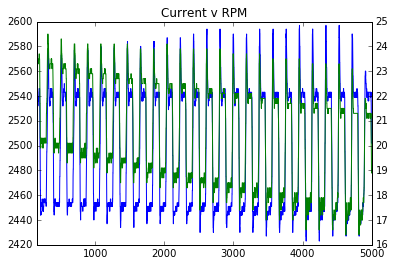

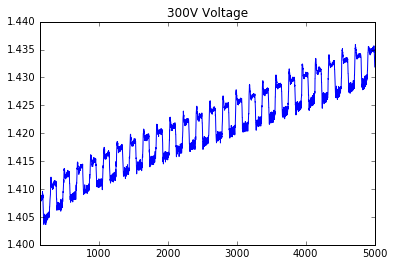

In [275]:
run6.rpm.plot()
run6.ds_cur_300v.plot(title="Current v RPM", secondary_y=True)
figure()
run6.an_volt.plot(title="300V Voltage")

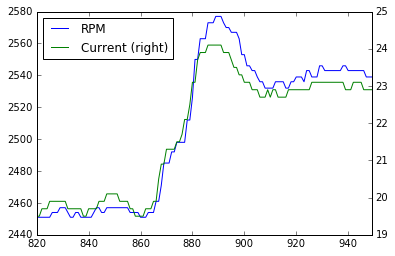

In [276]:
# Look at the overshoot
step_start = run6[670:800]
step_start.rpm.plot(label="RPM", legend=True)
step_start.ds_cur_300v.plot(secondary_y=True, label="Current", legend=True)

We don't have a good measurement of the step - we could see it on the scope, but the value read by the DeepSea has very coarse granularity, and shows an overshoot which did not appear on the scope

(18, 27)

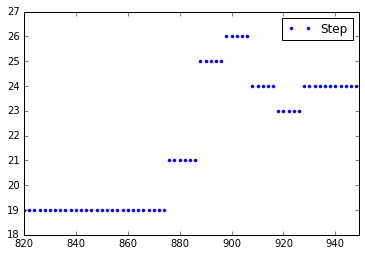

In [277]:
step_start.soc.plot(label="Step", legend=True, style='.', markevery=2)
ylim([18, 27])

# Calculate Gain and Offset

[ 39.95938355   0.13825532]


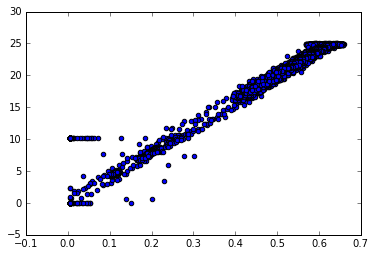

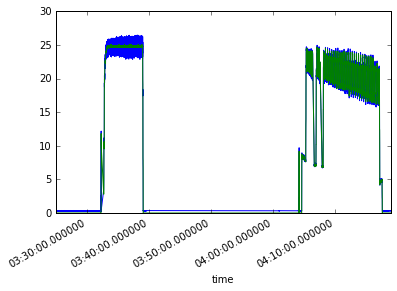

In [284]:
scatter(df.an_cur_300v, df.ds_cur_300v)
figure()
fit = polyfit(df.an_cur_300v, df.ds_cur_300v, deg=1)
df.san_cur_300v = df.an_cur_300v * fit[0] + fit[1]
df.san_cur_300v.plot()
df.ds_cur_300v.plot()
print(fit)